In [1]:
# load libaries
library(forcats) 
library(tidyverse)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


In [2]:
# write statements to import the data from the King County Housing csv file
df_orig <- read_csv("kc_house_data.csv")

Parsed with column specification:
cols(
  .default = col_integer(),
  id = col_character(),
  date = col_datetime(format = ""),
  price = col_double(),
  bathrooms = col_double(),
  floors = col_double(),
  lat = col_double(),
  long = col_double()
)
See spec(...) for full column specifications.


In [3]:
# show a preview of the data, including the number of Observations and Variables
glimpse(df_orig)
summary(df_orig)

Observations: 21,613
Variables: 21
$ id            <chr> "7129300520", "6414100192", "5631500400", "2487200875...
$ date          <dttm> 2014-10-13, 2014-12-09, 2015-02-25, 2014-12-09, 2015...
$ price         <dbl> 221900, 538000, 180000, 604000, 510000, 1225000, 2575...
$ bedrooms      <int> 3, 3, 2, 4, 3, 4, 3, 3, 3, 3, 3, 2, 3, 3, 5, 4, 3, 4,...
$ bathrooms     <dbl> 1.00, 2.25, 1.00, 3.00, 2.00, 4.50, 2.25, 1.50, 1.00,...
$ sqft_living   <int> 1180, 2570, 770, 1960, 1680, 5420, 1715, 1060, 1780, ...
$ sqft_lot      <int> 5650, 7242, 10000, 5000, 8080, 101930, 6819, 9711, 74...
$ floors        <dbl> 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0...
$ waterfront    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
$ view          <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0,...
$ condition     <int> 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3, 3, 3, 4,...
$ grade         <int> 7, 7, 6, 7, 8, 11, 7, 7, 7, 7, 8, 7, 7, 7, 7, 9, 7, 7...
$ sqft_above    <

      id                 date                         price        
 Length:21613       Min.   :2014-05-02 00:00:00   Min.   :  75000  
 Class :character   1st Qu.:2014-07-22 00:00:00   1st Qu.: 321950  
 Mode  :character   Median :2014-10-16 00:00:00   Median : 450000  
                    Mean   :2014-10-29 04:38:01   Mean   : 540088  
                    3rd Qu.:2015-02-17 00:00:00   3rd Qu.: 645000  
                    Max.   :2015-05-27 00:00:00   Max.   :7700000  
    bedrooms        bathrooms      sqft_living       sqft_lot      
 Min.   : 0.000   Min.   :0.000   Min.   :  290   Min.   :    520  
 1st Qu.: 3.000   1st Qu.:1.750   1st Qu.: 1427   1st Qu.:   5040  
 Median : 3.000   Median :2.250   Median : 1910   Median :   7618  
 Mean   : 3.371   Mean   :2.115   Mean   : 2080   Mean   :  15107  
 3rd Qu.: 4.000   3rd Qu.:2.500   3rd Qu.: 2550   3rd Qu.:  10688  
 Max.   :33.000   Max.   :8.000   Max.   :13540   Max.   :1651359  
     floors        waterfront            view   

In [4]:
# change data types and clean data
df <- df_orig %>%
    mutate(waterfront = as.logical(waterfront),
    view = as.factor(view),
    condition = as.factor(condition),
    grade = as.factor(grade),
    zipcode = as.factor(zipcode),
    yr_renovated = replace(yr_renovated, yr_renovated==0, NA))

glimpse(df)
summary(df)

Observations: 21,613
Variables: 21
$ id            <chr> "7129300520", "6414100192", "5631500400", "2487200875...
$ date          <dttm> 2014-10-13, 2014-12-09, 2015-02-25, 2014-12-09, 2015...
$ price         <dbl> 221900, 538000, 180000, 604000, 510000, 1225000, 2575...
$ bedrooms      <int> 3, 3, 2, 4, 3, 4, 3, 3, 3, 3, 3, 2, 3, 3, 5, 4, 3, 4,...
$ bathrooms     <dbl> 1.00, 2.25, 1.00, 3.00, 2.00, 4.50, 2.25, 1.50, 1.00,...
$ sqft_living   <int> 1180, 2570, 770, 1960, 1680, 5420, 1715, 1060, 1780, ...
$ sqft_lot      <int> 5650, 7242, 10000, 5000, 8080, 101930, 6819, 9711, 74...
$ floors        <dbl> 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0...
$ waterfront    <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALS...
$ view          <fctr> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0...
$ condition     <fctr> 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3, 3, 3, 4...
$ grade         <fctr> 7, 7, 6, 7, 8, 11, 7, 7, 7, 7, 8, 7, 7, 7, 7, 9, 7, ...
$ sqft_above    <

      id                 date                         price        
 Length:21613       Min.   :2014-05-02 00:00:00   Min.   :  75000  
 Class :character   1st Qu.:2014-07-22 00:00:00   1st Qu.: 321950  
 Mode  :character   Median :2014-10-16 00:00:00   Median : 450000  
                    Mean   :2014-10-29 04:38:01   Mean   : 540088  
                    3rd Qu.:2015-02-17 00:00:00   3rd Qu.: 645000  
                    Max.   :2015-05-27 00:00:00   Max.   :7700000  
                                                                   
    bedrooms        bathrooms      sqft_living       sqft_lot      
 Min.   : 0.000   Min.   :0.000   Min.   :  290   Min.   :    520  
 1st Qu.: 3.000   1st Qu.:1.750   1st Qu.: 1427   1st Qu.:   5040  
 Median : 3.000   Median :2.250   Median : 1910   Median :   7618  
 Mean   : 3.371   Mean   :2.115   Mean   : 2080   Mean   :  15107  
 3rd Qu.: 4.000   3rd Qu.:2.500   3rd Qu.: 2550   3rd Qu.:  10688  
 Max.   :33.000   Max.   :8.000   Max.   :13540 

In [5]:
# remove columns sqft_above, sqft_living15, sqft_lot15
# as proposed in question 4, if appropriate for the specific analysis question
# saving as a new df
df2 <- select(df, -sqft_above, -ends_with("15"))
glimpse(df2)
summary(df2)

Observations: 21,613
Variables: 18
$ id            <chr> "7129300520", "6414100192", "5631500400", "2487200875...
$ date          <dttm> 2014-10-13, 2014-12-09, 2015-02-25, 2014-12-09, 2015...
$ price         <dbl> 221900, 538000, 180000, 604000, 510000, 1225000, 2575...
$ bedrooms      <int> 3, 3, 2, 4, 3, 4, 3, 3, 3, 3, 3, 2, 3, 3, 5, 4, 3, 4,...
$ bathrooms     <dbl> 1.00, 2.25, 1.00, 3.00, 2.00, 4.50, 2.25, 1.50, 1.00,...
$ sqft_living   <int> 1180, 2570, 770, 1960, 1680, 5420, 1715, 1060, 1780, ...
$ sqft_lot      <int> 5650, 7242, 10000, 5000, 8080, 101930, 6819, 9711, 74...
$ floors        <dbl> 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0...
$ waterfront    <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALS...
$ view          <fctr> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0...
$ condition     <fctr> 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3, 3, 3, 4...
$ grade         <fctr> 7, 7, 6, 7, 8, 11, 7, 7, 7, 7, 8, 7, 7, 7, 7, 9, 7, ...
$ sqft_basement <

      id                 date                         price        
 Length:21613       Min.   :2014-05-02 00:00:00   Min.   :  75000  
 Class :character   1st Qu.:2014-07-22 00:00:00   1st Qu.: 321950  
 Mode  :character   Median :2014-10-16 00:00:00   Median : 450000  
                    Mean   :2014-10-29 04:38:01   Mean   : 540088  
                    3rd Qu.:2015-02-17 00:00:00   3rd Qu.: 645000  
                    Max.   :2015-05-27 00:00:00   Max.   :7700000  
                                                                   
    bedrooms        bathrooms      sqft_living       sqft_lot      
 Min.   : 0.000   Min.   :0.000   Min.   :  290   Min.   :    520  
 1st Qu.: 3.000   1st Qu.:1.750   1st Qu.: 1427   1st Qu.:   5040  
 Median : 3.000   Median :2.250   Median : 1910   Median :   7618  
 Mean   : 3.371   Mean   :2.115   Mean   : 2080   Mean   :  15107  
 3rd Qu.: 4.000   3rd Qu.:2.500   3rd Qu.: 2550   3rd Qu.:  10688  
 Max.   :33.000   Max.   :8.000   Max.   :13540 

      id                 date                         price        
 Length:574         Min.   :2014-05-02 00:00:00   Min.   : 225000  
 Class :character   1st Qu.:2014-07-14 00:00:00   1st Qu.: 509438  
 Mode  :character   Median :2014-09-25 00:00:00   Median : 615000  
                    Mean   :2014-10-16 05:26:07   Mean   : 645232  
                    3rd Qu.:2015-01-20 18:00:00   3rd Qu.: 751000  
                    Max.   :2015-05-13 00:00:00   Max.   :2200000  
                                                                   
    bedrooms       bathrooms      sqft_living      sqft_lot     
 Min.   :2.000   Min.   :1.000   Min.   : 790   Min.   :   785  
 1st Qu.:3.000   1st Qu.:2.000   1st Qu.:1782   1st Qu.:  6962  
 Median :4.000   Median :2.500   Median :2299   Median :  8681  
 Mean   :3.617   Mean   :2.365   Mean   :2364   Mean   : 11122  
 3rd Qu.:4.000   3rd Qu.:2.500   3rd Qu.:2900   3rd Qu.: 11195  
 Max.   :6.000   Max.   :4.750   Max.   :4980   Max.   :111078  
 

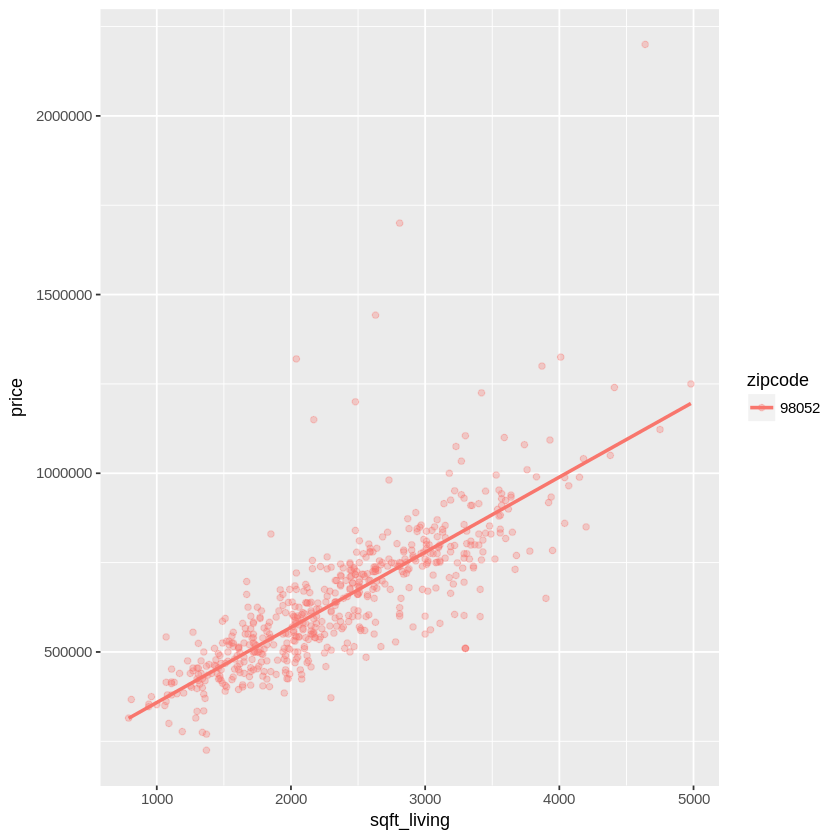

In [6]:
# Bonus: Plot price by square foot for 98052
df_98052 <- df %>% filter(zipcode == 98052) %>% mutate(zipcode = fct_drop(zipcode))
summary(df_98052)

ggplot(df_98052, mapping = aes(x = sqft_living, y = price, color = zipcode)) +  
    geom_jitter(alpha = 0.3) + 
    geom_smooth(method = "lm", se = FALSE)